# Top 1000 highest grossing movies

## Setup
This project can be carried out in any of the free Notebook services online with Python3 programming. The modules required are:
- NumPy
- Pandas
- Matplotlib
- Seaborn

In the following slides I have been using the Jovian.ml notebooks so I will be importing and committing as a way of saving and updating my notebook hosted by Jovian.ml but this can be done on any of the available Notebook services such as Google Colab, Jupyter Notebooks, etc.

### Package install and import

In [51]:
!pip install jovian opendatasets --upgrade --quiet

In [52]:
import jovian

In [53]:
# Execute this to save new versions of the notebook
jovian.commit(project="data-analysis-exploratory-kagen")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "talharishad21/data-analysis-exploratory-kagen" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/talharishad21/data-analysis-exploratory-kagen


'https://jovian.ai/talharishad21/data-analysis-exploratory-kagen'

In [54]:
# Change this
dataset_url = 'https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies'  

In [55]:
import opendatasets as od
od.download(dataset_url)


Skipping, found downloaded files in "./top-1000-highest-grossing-movies" (use force=True to force download)


### Unloading the dataset from kaggle
Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas. Let's take a glimpse at how the data looks like.

In [56]:
# Change this
data_dir = './top-1000-highest-grossing-movies'

In [57]:
import os
os.listdir(data_dir)

['Highest Holywood Grossing Movies.csv']

In [58]:
project_name="data_analysis_exploratory_kagen"

In [59]:
!pip install jovian --upgrade -q

In [60]:
import jovian

In [61]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "talharishad21/data-analysis-exploratory-kagen" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/talharishad21/data-analysis-exploratory-kagen


'https://jovian.ai/talharishad21/data-analysis-exploratory-kagen'

### Data information

In [62]:
import pandas as pd
import numpy as np

In [63]:
data_df=pd.read_csv('./top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv')

In [64]:
data_df.head(5)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


**After a quick glimpse at the dataset, it looks like a typical movies dataset without user ratings. We can also see that there are NaN values in some columns**


### Data Preparation and Cleaning
we will begin the work to clean dataset and shape in according to are requirement and the answers we are looking from from the dataset
**Exploring the number of rows,columns,ranges**

In [65]:
data_df.shape

(918, 11)

In [66]:
data_df.columns

Index(['Unnamed: 0', 'Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

In [67]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


**Here are 918 entries and 11 columns to work with for EDA**
- Explore the number of rows & columns, ranges of values etc.
- As you can see column: "unnamed:0","movies info" are irrelevant and contain missing value 
- There are 3 int column to work with for statistical analysis
- 5 object column , 1 float column, 1 datetime column

**Dropping all those column which has missing value and not much useful**


### Handling the missing value,incorrect data and invalid data

In [68]:
#removing certain columns which are not useful
data_df.drop('Unnamed: 0', axis=1, inplace=True)

In [69]:
#removing it cause it contains summary of movie which are not useful in EDA
data_df.drop('Movie Info', axis=1, inplace=True)

In [70]:
#removing releasedate which has missing value
data_df.drop('Release Date',axis=1, inplace=True)

In [71]:
#Removing the duplicate values 

data_df.drop_duplicates(inplace = True)

In [72]:
#renamed columns to more accessible form. 
data_df.rename(columns={'Domestic Sales (in $)':'Domestic_sales',
                        'International Sales (in $)':'International_sales',
                        'World Sales (in $)':'World_sales'}, inplace=True)

### Created additional year column extracted from 'Title'

In [73]:
#Adding a new column yearA 
data_df["yearA"] = data_df["Title"].str.extract(r'\b(\d{4})\b')

Handle missing, incorrect and invalid data
- dropped 2 columns , unnamed & movies info which was irrelevant in dataframe
- At first i converted release_date but there were many missing value i was not working with months so dropped release_date
- rename 3 integers column title to make it more easy
- removed all duplicates
- Extracted a new yearA column from title which was correct and there were no missing value or invalid data 


In [74]:
data_df['yearA'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Name: yearA, Length: 918, dtype: bool

**Now there is no missing value in yearA and we can use it to make analysis** 

In [75]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                918 non-null    object
 1   Distributor          918 non-null    object
 2   Domestic_sales       918 non-null    int64 
 3   International_sales  918 non-null    int64 
 4   World_sales          918 non-null    int64 
 5   Genre                918 non-null    object
 6   Movie Runtime        918 non-null    object
 7   License              744 non-null    object
 8   yearA                918 non-null    object
dtypes: int64(3), object(6)
memory usage: 71.7+ KB


**As you can see only LICENSE value has 744 value**
- there are few missing value in license column which is categorised of rating of the movies
- I have not deleted this column as it was not necessary and was not used in my data 
- No changes have been made in license column

## A- Exploratory Analysis and Visualization

Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is 
required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 


In [76]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### a1 DISTRIBUTOR

lets see the number of distributor and movies produced by them, as it tell a lot about the enterprises and their market strategy i.e: number of media outlets, investment and budget 

In [77]:
distributor_df = data_df.groupby("Distributor")[['Title']].count()

<AxesSubplot:xlabel='Distributor'>

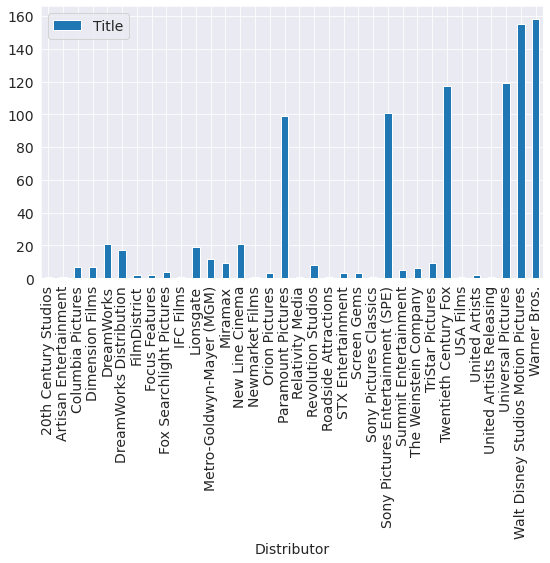

In [78]:
#MOST MOVIES PRODUCED BY A DISTRIBUTOR.
distributor_df.plot(kind="bar")

**This shows the number of movies produced by companies from lowest to highest.
if we want, we can search for many questions related to the distributor like what makes them standout from the rest? 
does more investment on film make it top grossing ? or not 
is it true that large budget doesn't mean the film will be successful?**

### a2 Relationship between world,domestic,international sales

**All these sales are in million dollars and world sales is the sum of domestic and international sales
as you can see the domestic sales has contributed more than international and among world sales**

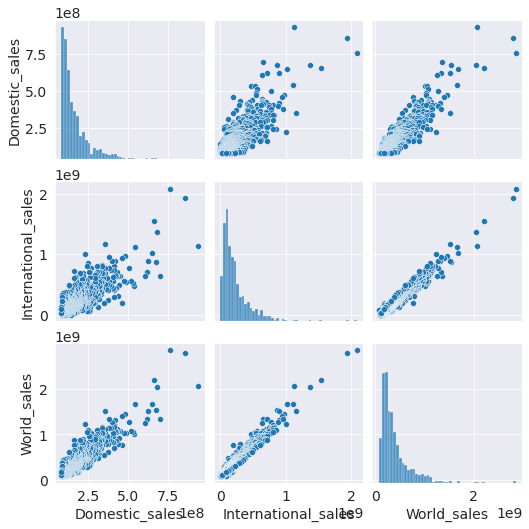

In [79]:
#pairwise relationship between all sales 
sns.pairplot(data_df)
plt.show()

### a3 Correlation between the sales

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related.

In [80]:
#Computing pairwise correlation of columns.
data_df.corr()

,Domestic_sales,International_sales,World_sales
Domestic_sales,1.000000,0.797462,0.904564
International_sales,0.797462,1.000000,0.976998
World_sales,0.904564,0.976998,1.000000


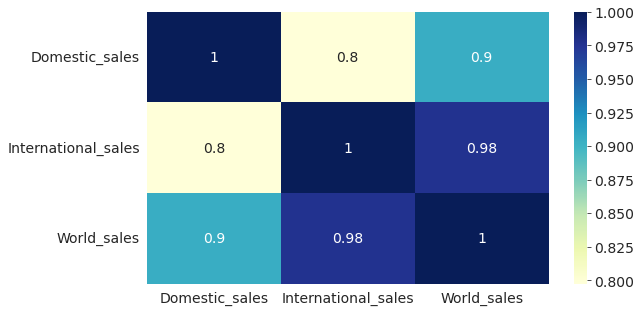

In [81]:
# correlation between sales
sns.heatmap(data_df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

The value of correlation coefficient can take any values from -1 to 1.

If the value is 1, it is said to be positive correlation between two variables. This means that when one variable increases, the other variable also increases.
If the value is -1, it is said to be negative correlation between two variables. This means that when one variable increases, the other variable decreases.
If the value is 0, there is no correlation between two variables. This means that the variables changes in a random manner with respect to each other.

###  Popular Genre
This is a list of genres of literature and entertainment (film, television, music, and video games), excluding genres in the visual arts.
Genre is the term for any category of creative work, which includes literature and other forms of art or entertainment (e.g. music)—whether written or spoken, audio or visual—based on some set of stylistic criteria. Genres are formed by conventions that change over time as new genres are invented and the use of old ones are discontinued. Often, works fit into multiple genres by way of borrowing and recombining these conventions.

Text(0, 0.5, 'Genre')

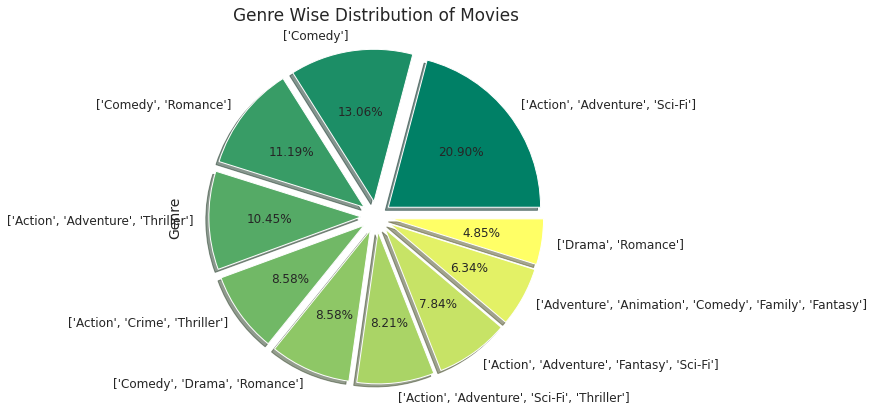

In [82]:

data_df['Genre'].value_counts()[:10].plot(kind='pie',explode=np.full(10,0.1),fontsize=12,autopct='%3.2f%%',
                                       shadow=True,cmap='summer',figsize=(10,7))
plt.title('Genre Wise Distribution of Movies')
plt.ylabel('Genre')

- **'Action, Adventure,Sci-Fi' & comedy** are the **'Genre** on which 33% of the movies based in the movie dataset.
- Most of the movies contain **combination** of **'Genre'** like **Drama** ,**thriller**, **adventure.**
- This Data shows most revenue is pulled by **action, adventure,sci-fi** as no. of target audience prefer this genre
- **Sci-fi** movies are gaining upper hand these days as it makes thoughts into reality **what if we can fly**,**how people live in space** with the increasing Technology in vfx,graphics quality the visuals are very real like. 

### C LICENSE


The distribution of Viewer's age is another crucial factor to look at. We can use a bar to visualize it. this data maynot be accurate as it only shows the license of movies release under the respective license criteria and all the movies here are top grossing movies


In [83]:
license = data_df['License'].value_counts()
license_df = license

Text(0, 0.5, 'movies')

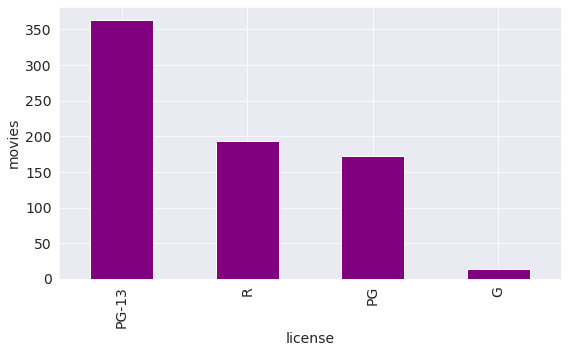

In [84]:
license_df.plot(kind="bar", color='purple')
plt.xlabel("license")
plt.ylabel("movies")

**PG-13: Parents Strongly Cautioned, Some Material May Be Inappropriate for Children Under 13. This rating is a stronger caution for parents that content included may not be appropriate for children under 13 (pre-teen ages). This may include stronger language, extended violence or sexual situations and drug-use.
Anyone can go see a PG-13 movie. For R if you're under 17 you must be with an adult, PG-13 has no restrictions. You must be with an adult if you're under 13 and want to see a PG-13.


### Asking and Answering Questions

#### QA: who is most successful distributor and why?

Here i have taken top (3) distributor based on no. of movie produced and calculate the sum total of world sales individually using sum function where walt disney takes the top 1 spot

In [85]:
# code to get information on a top 3 distributor
warner = data_df[data_df["Distributor"] == "Warner Bros."]
walt_disney = data_df[data_df["Distributor"] == "Walt Disney Studios Motion Pictures"]
universal_studios = data_df[data_df["Distributor"] == "Universal Pictures"]

In [86]:
#total sales of UNIVERSAL STUDIOS
universal_studios["World_sales"].sum()

45602644818

In [87]:
#TOTAL SALES OF WALT DISNEY
walt_disney["World_sales"].sum()

82372098598

In [88]:
#TOTAL SALES OF WARNER BROS.
warner_sales_df = warner["World_sales"].sum()

warner_sales_df

63597493931

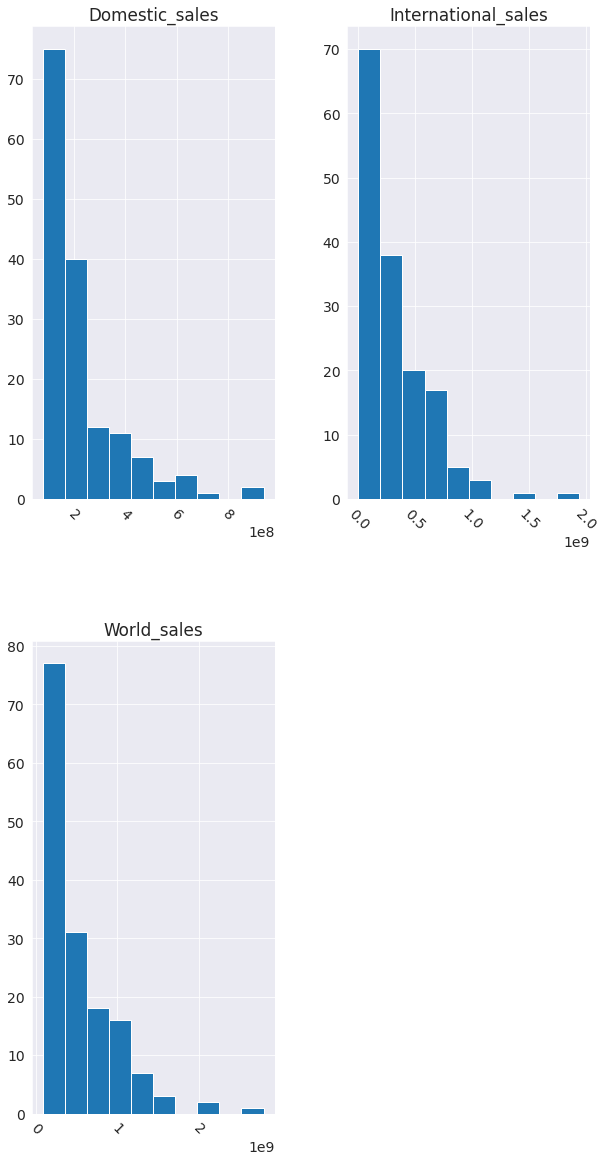

In [89]:
#DETAILS OF WALT DISNEY

walt_disney = data_df[data_df["Distributor"] == "Walt Disney Studios Motion Pictures"]
walt_disney.hist(figsize=(10,20), xrot=-45)
plt.show()


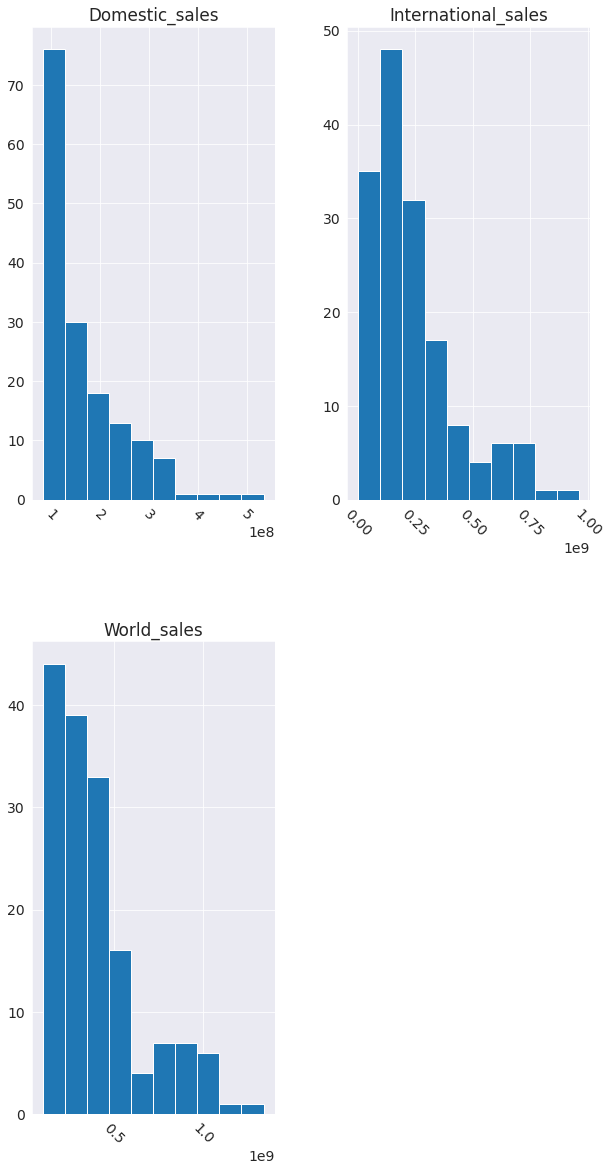

In [90]:
# DETAILS OF WARNER BROS. 

warner = data_df[data_df["Distributor"] == "Warner Bros."]
warner.hist(figsize=(10,20), xrot=-45)
plt.show()

**Walt Disney – the man and the company – is one of the most successful and powerful entertainment companies in the world, with a market cap of $238.9 billion**
constantly innovating and pushing the boundaries of both animation and business, was the company able to go from a moderately successful animation studio to a complete entertainment experience – with theme parks, merchandising, cruise ships, and more.
**After its acquisition of 21st Century Fox in March 2019, Disney became the largest media powerhouse on the planet**
source:investopedia

#### QB: which distributor has produced the most number of movies among top grossing movies of all time?

In [91]:
# calling out the function from above EDA
distributor_df

,Title
Distributor,
20th Century Studios,1
Artisan Entertainment,1
Columbia Pictures,7
Dimension Films,7
DreamWorks,21
DreamWorks Distribution,17
FilmDistrict,2
Focus Features,2
Fox Searchlight Pictures,4


As you can see above the close competition between two gaint companies : warner bros. ,walter disney
time warner or Warner bros. may have produced more movies(158) than disney which made it to the list of one of the highest grossing movies

#### QC: HIGHEST AND LOWEST grossing movies on the global scales ?


In [109]:
print(data_df.Title[data_df["World_sales"]==data_df["World_sales"].max()])

2    Avatar (2009)
Name: Title, dtype: object


In [110]:
print(data_df.Title[data_df["World_sales"]==data_df["World_sales"].min()])

903    MASH (1970)
Name: Title, dtype: object


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


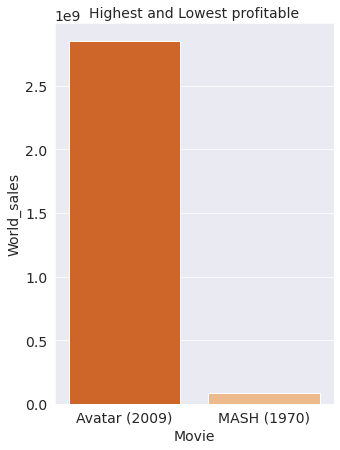

In [111]:
plt.figure(figsize=(5,7))
dd=data_df[(data_df["World_sales"]==data_df["World_sales"].max())|(data_df["World_sales"]==data_df["World_sales"].min())]
sns.barplot(dd['Title'],dd['World_sales'],palette='Oranges_r')
plt.title('Highest and Lowest profitable', fontsize = 14)
plt.xlabel('Movie')
plt.ylabel('World_sales')
plt.show()

**Avatar**
The movie was filled with technological firsts, which allowed it to climb up the top of movie charts everywhere. Others will attribute the movie's success to how immersive the world of Avatar felt, especially with the 3D graphics that came in theaters and later for home viewings
Directors: James Cameron
Music composed by: James Horner

**MASH**
became the most successful comedy of 1970, one of the most profitable properties of the decade for Fox and the basis for one of the top-rated TV shows of the '70s and '80s.
it is also based on the best-seling novel
source:wikipedia

#### QD: which are the top 10 highest grossing movies of all time ?

In [112]:
# arranged in highest to lower order of world sales and using head method to give top 10 heading from descending
highest_grossing_df = data_df.sort_values("World_sales",ascending=False).head(10)

highest_grossing_df

# as world sales is the combination of international and domestic sales 

,Title,Distributor,Domestic_sales,International_sales,World_sales,Genre,Movie Runtime,License,yearA
2,Avatar (2009),Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019
6,Titanic (1997),Paramount Pictures,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,1997
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2018
7,Jurassic World (2015),Universal Pictures,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,2015
11,The Lion King (2019),Walt Disney Studios Motion Pictures,543638043,1119261396,1662899439,"['Adventure', 'Animation', 'Drama', 'Family', ...",1 hr 58 min,PG,2019
5,Spider-Man: No Way Home (2021),Sony Pictures Entertainment (SPE),675813257,868642706,1544455963,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 28 min,NaN,2021
8,The Avengers (2012),Walt Disney Studios Motion Pictures,623357910,895457605,1518815515,"['Action', 'Adventure', 'Sci-Fi']",2 hr 23 min,PG-13,2012
54,Furious 7 (2015),Universal Pictures,353007020,1162334379,1515341399,"['Action', 'Thriller']",2 hr 17 min,PG-13,2015


#### QE: Year-wise Distribution of top 1000 highest grossing movies ?and which was the best year for cinema

Text(0.5, 1.0, 'No of Movies Releasd Yearwise')

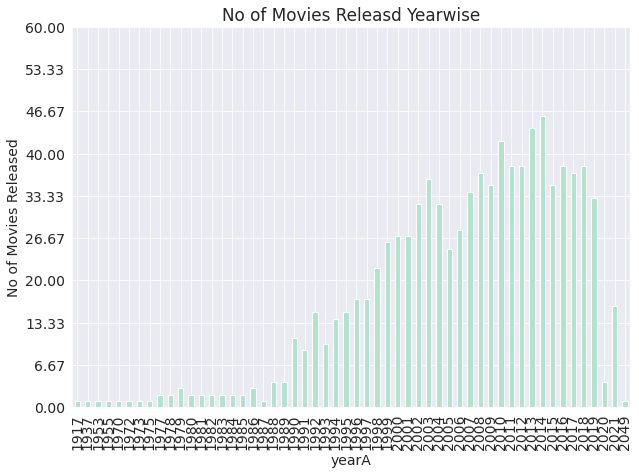

In [113]:
# As you can tell 2013-2014 was the best year for cinema.
data_df.groupby('yearA').count()['Title'].plot(kind='bar',figsize=(10,7),yticks=np.linspace(0,60,10),cmap='Pastel2')
plt.xlabel('yearA')
plt.ylabel('No of Movies Released')
plt.title('No of Movies Releasd Yearwise')

- Movies dataset contains **approximately 1000 of top grossing movies** of all time from year **1970.**
- Movies datset shows **increasing** trend of movies year on year.  Data fom 2000 till 2003 shows steady progress. 
- However **increase** in number of movies from 2008 - 2015 which also show the distributor are able to connect with more viewer
- As during 2008 first OTT platform was launched by reliance in india, which provides access to both live TV and on–demand content.(i.e to explain that distributor were able to connect on different platform)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2019'),
  Text(2, 0, '2009'),
  Text(3, 0, '2018'),
  Text(4, 0, '2021'),
  Text(5, 0, '1997'),
  Text(6, 0, '2012'),
  Text(7, 0, '2017'),
  Text(8, 0, '2008'),
  Text(9, 0, '2016'),
  Text(10, 0, '1999'),
  Text(11, 0, '1977'),
  Text(12, 0, '2004'),
  Text(13, 0, '1982'),
  Text(14, 0, '2013'),
  Text(15, 0, '2006'),
  Text(16, 0, '1994'),
  Text(17, 0, '2010'),
  Text(18, 0, '2002'),
  Text(19, 0, '1993'),
  Text(20, 0, '2011'),
  Text(21, 0, '2003'),
  Text(22, 0, '2005'),
  Text(23, 0, '2014'),
  Text(24, 0, '2007'),
  Text(25, 0, '2001'),
  Text(26, 0, '1983'),
  Text(27, 0, '1996'),
  Text(28, 0, '1980'),
  Text(29, 0, '1990'),
  Text(30, 0, '1975'),
  Text(31, 0, '2000'),
  Text(32, 0, '1989'),
 

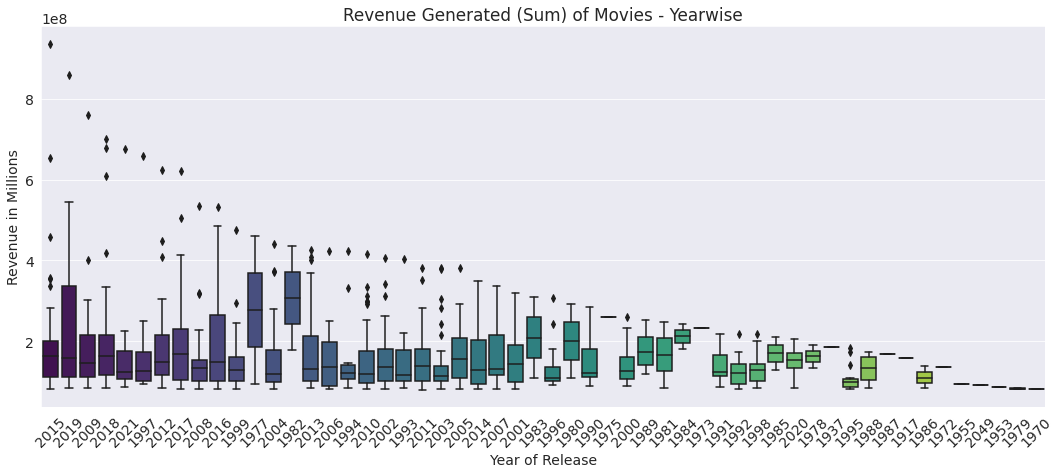

In [114]:
plt.figure(figsize=(18,7))
sns.boxplot(data=data_df,x='yearA',y='Domestic_sales',palette='viridis',width=0.8 )
plt.xlabel('Year of Release')
plt.ylabel('Revenue in Millions')
plt.title('Revenue Generated (Sum) of Movies - Yearwise')
plt.xticks(rotation=45)


**Domestic revenue generated is taken into consideration as it has more influence in generating revenue 
Distributors receive the returns from theater owners on a weekly basis. As if the film is released in multiplex, 50% of the first week's collection, 42% in the second week, 37% in the third week and thereafter fixed 30% share is given to the film distributors.**

#### QF: which type of movies people prefer more and why ?

Text(0, 0.5, 'Genre')

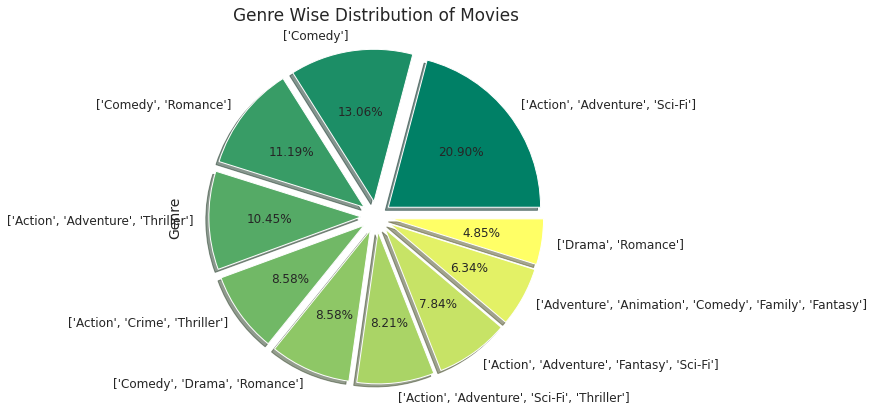

In [115]:

data_df['Genre'].value_counts()[:10].plot(kind='pie',explode=np.full(10,0.1),fontsize=12,autopct='%3.2f%%',
                                       shadow=True,cmap='summer',figsize=(10,7))
plt.title('Genre Wise Distribution of Movies')
plt.ylabel('Genre')


As you can see action,adventure,sci-fi has much more content for a mature audience it not only targets adult but teenage also, action,adventure gives escape from reality gives thrill experience to enjoy adventure and journey with including technical vfx,visuals it opens our mind to whole new world and it shows all the things which will be possible in future

In [116]:
import jovian

In [117]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "talharishad21/data-analysis-exploratory-kagen" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/talharishad21/data-analysis-exploratory-kagen


'https://jovian.ai/talharishad21/data-analysis-exploratory-kagen'

## Inferences and Conclusion

- Based on **this dataset**, **no formula** of producing a **high revenue** generation movie **could be drawn.** 

- As we don't have list of directors in this dataframe but we can check on google which director is associated with movie

- Most of the **parameters** of **this dataset** are **not co-related** with each other and hence they **are not impacting** each other +vely or -vely as well.  

- This **dataset** gives an **idea** about the **inclination of the viewers liking** and **most critics acclaimed movies.** 

- As per this dataset,**top-1000 grossing movies of all time** **2010,2013,2014** have most number of releases movie so there are chances that distributor have generated most revenue 

<a name = Section92></a>
### **Actionable Insights**

- Movie that contains **Action/Adventure/Sci-Fi** are more likely to **generate high revenue.** Movies with **combination of 2/3 Gener's** are **preferred by viewers** compared to sole genre. 


- **ACTION** movies are **appreciated by critics** and also scoring **good ratings** from maximum audience.This is a genre which falls in **good to watch** category.


- Few **actors** and **directors** could be recommended have given **high revenue generation** movies as actors/directors contribute in watching movies  

- Movies of duration have not taken into consideration for this analysis as viewers also prefers OTT platform to watch series which are of 20-40 minutes, time of movies doesn't make much of difference


- Movies produced in **Hollywood** are likely to generate **high revenue** compared to movies produced **outside i.e bollywood** as those movies are likely to get **vast viewership** and language is no barrier as english is mostly acceptable across globe 

- If we compare **hollywood** with **bollywood** there is a vast difference in top grossing movie of bollywood "DANGAL"stands at 277 million globally

## References and Future Work
- As in future my focus will be to make a deep analysis as this is my first project and while completing this with jovian i have achived a new set of skills 
- i think the data must have few more content to play with such which could have been more useful in analysis **Actors, Director,Viewer-rating, Crtics-rating, Netprofit, Gross profit**
- netflix movies

- https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-6-exploratory-data-analysis-a-case-study#C53

- google 
- wikipedia
to prove the point for question D
https://www.csmonitor.com/The-Culture/2013/0102/Hollywood-s-record-haul-why-2012-was-a-great-year-for-movies